# Imports

In [1]:
import pandas as pd
from src.config import Config
from src.ensemble import Ensemble
from sklearn import metrics
import warnings

warnings.filterwarnings("ignore")

# Load Datasets

In [2]:
train_df = pd.read_csv(Config.filepath("train_prepared_both_le.csv"))
test_df = pd.read_csv(Config.filepath("test_prepared_both_le.csv"))

# Initialize The Ensemble

In [3]:
exclude = None
ensemble = Ensemble(train_df=train_df, test_df=test_df, exclude=exclude, l1_trials=10, l2_trials=10)

# Train Level 1 Models

In [4]:
ensemble.train_level_one_models()

AdaBoost:

Finding hyperparameters using Optuna...

Best parameters: {'n_estimators': 340, 'learning_rate': 0.22948683681130552, 
'tune_estimator': False}

Training model with best parameters...

	Fold 1 - Accuracy =  0.7855
	Fold 2 - Accuracy =  0.7901
	Fold 3 - Accuracy =  0.7982
	Fold 4 - Accuracy =  0.7952
	Fold 5 - Accuracy =  0.8090
	Overall accuracy =  0.7956


Done!

LightGBM:

Finding hyperparameters using Optuna...

Best parameters: {'num_leaves': 62, 'max_depth': 21, 'learning_rate': 
0.020682435846372867, 'n_estimators': 488, 'reg_alpha': 4.162213204002109, 'reg_lambda': 
1.0616955533913808, 'min_child_samples': 23, 'subsample_for_bin': 3100}

Training model with best parameters...

	Fold 1 - Accuracy =  0.7959
	Fold 2 - Accuracy =  0.7959
	Fold 3 - Accuracy =  0.8097
	Fold 4 - Accuracy =  0.8193
	Fold 5 - Accuracy =  0.8113
	Overall accuracy =  0.8064


Done!

Logistic Regression:

Finding hyperparameters using Optuna...

Best parameters: {'tol': 1.9010245319870378e-06, 'C': 0.7496501097315297, 'solver': 
'liblinear'}

Training model with best parameters...

	Fold 1 - Accuracy =  0.7890
	Fold 2 - Accuracy =  0.7924
	Fold 3 - Accuracy =  0.8010
	Fold 4 - Accuracy =  0.7986
	Fold 5 - Accuracy =  0.8038
	Overall accuracy =  0.7970


Done!

Random Forest:

Finding hyperparameters using Optuna...

Best parameters: {'n_estimators': 262, 'max_depth': 22, 'min_samples_split': 2, 
'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'ccp_alpha': 
0.03151987295193889}

Training model with best parameters...

	Fold 1 - Accuracy =  0.7407
	Fold 2 - Accuracy =  0.7280
	Fold 3 - Accuracy =  0.7320
	Fold 4 - Accuracy =  0.7417
	Fold 5 - Accuracy =  0.7434
	Overall accuracy =  0.7371


Done!

XGBoost:

Finding hyperparameters using Optuna...

Best parameters: {'max_depth': 11, 'n_estimators': 417, 'alpha': 1.0616955533913808, 
'lambda': 1.3399549522183016, 'learning_rate': 0.05478357268196331, 'colsample_bytree': 
0.4433937943676302, 'colsample_bylevel': 0.6198051453057902, 'min_child_weight': 
43.76255684556946, 'sampling_method': 'gradient_based', 'early_stopping_rounds': 5}

Training model with best parameters...

	Fold 1 - Accuracy =  0.7987
	Fold 2 - Accuracy =  0.8022
	Fold 3 - Accuracy =  0.8131
	Fold 4 - Accuracy =  0.8067
	Fold 5 - Accuracy =  0.8153
	Overall accuracy =  0.8072


Done!

# Train Level 2 Model

In [5]:
model_name = "lr"
result = ensemble.train_level_two_model(model_name=model_name)

Training Logistic Regression as level 2 model...

Finding optimal hyperparameters using Optuna...

Best params: {'tol': 5.611516415334504e-06, 'C': 1.8679147494991148, 'solver': 
'newton-cg'}

Training model with optimal parameters...

	Fold 1 - Accuracy =  0.7970
	Fold 2 - Accuracy =  0.7999
	Fold 3 - Accuracy =  0.8148
	Fold 4 - Accuracy =  0.8188
	Fold 5 - Accuracy =  0.8142
	Overall accuracy =  0.8089


Done!

In [6]:
result.head()

,PassengerId,ada_preds,lgb_preds,lr_preds,rf_preds,xgb_preds,Transported
0,0013_01,0.499383,0.485711,0.596499,0.479129,0.399572,False
1,0018_01,0.483742,0.033362,0.001755,0.392839,0.044260,False
2,0019_01,0.511290,0.878389,0.987282,0.493598,0.929174,True
3,0021_01,0.513877,0.991767,0.992420,0.393493,0.938499,True
4,0023_01,0.500574,0.662118,0.456083,0.386046,0.570911,True


In [7]:
result["Transported"].value_counts()

False    2593
True     1684
Name: Transported, dtype: int64

# Confusion Matrix

<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f00ab513eb0>

<Figure size 432x288 with 2 Axes>

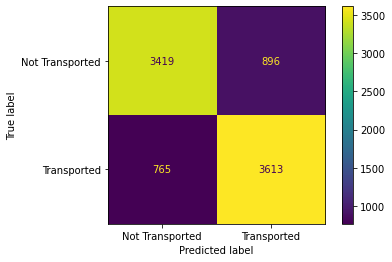

In [8]:
train_results = ensemble.meta_train_df
y_true = train_results["Transported"].astype(int)
y_pred = train_results["preds"]
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["Not Transported", "Transported"])